In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from src.model import Settings
from src.algorithm import BeesSolver

In [2]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use("seaborn-v0_8-whitegrid")

In [3]:
REPEATS = 5
ITERATIONS = 1000
SOLVER_SETTINGS = dict(
    population_size=12,
    modules_mutations=5,
    rockets_type_mutations=1,
    elite_sites=2,
    normal_sites=3,
    elite_site_size=2,
    normal_site_size=4
)

In [4]:
def results(solver):
    """
    Yields next solution of given generator.
    """
    solver.init_population()
    while True:
        solver.simulate_population()
        yield solver.current_cost()


def parameter_results(p_name, p_values, problem):
    """
    Returns results for given values of given parameter.
    """
    out = []

    for val in p_values:
        settings = SOLVER_SETTINGS.copy()
        settings[p_name] = val

        solver = BeesSolver(problem, **settings)

        out.append(list(itertools.islice(results(solver), ITERATIONS)))

    return out


def plot_parameter_impact(p_name, p_values, problem):
    """
    Plots changes in cost depending on value of parameter.
    """
    data = parameter_results(p_name, p_values, problem)

    for val, d in zip(p_values, data):
        plt.plot(d, label=val)

    plt.title(p_name)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.legend()

    return [d[-1] for d in data]

In [5]:
problem = Settings(num_rocket_types=7,
                   num_module_types=8,
                   num_rockets=8,
                   rocket_capacity=10,
                   additional_fuel_costs=np.array(
                       [[8.76, 3.83, 5.97, 6.99, 8.93, 6.34, 8.16, 4.76],
                        [6.18, 3.36, 5.5, 5.73, 8.55, 3.83, 8.33, 9.39],
                        [6.08, 3.98, 5.55, 9.11, 5.49, 3.86, 7.91, 3.31],
                        [7, 3, 7, 9, 4, 3, 10, 7],
                        [9.35, 3.64, 7.63, 9.99, 3.9, 9.55, 7.36, 4.86],
                        [9.96, 7.33, 3.31, 8.53, 8.07, 6.63, 7.42, 7.93],
                        [5.22, 8.53, 6.99, 5.29, 4.1, 8.67, 8.14, 9.58]]),
                   fuel_costs=np.array([38.3, 37.5, 37.1, 36.9, 38.1, 37.7, 37.3]),
                   module_amounts=np.array([6, 15, 9, 5, 1, 12, 20, 8]))


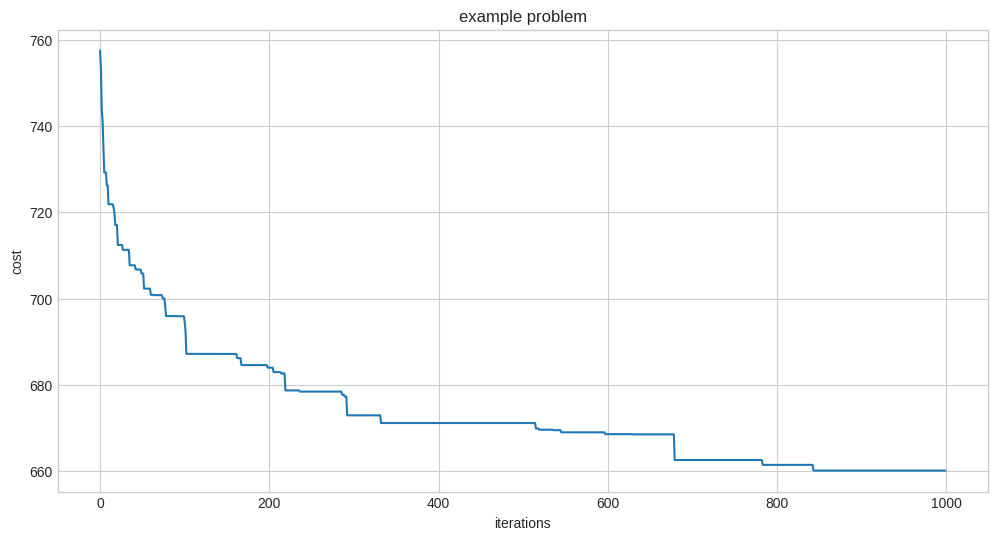

In [6]:
solver = BeesSolver(settings=problem, **SOLVER_SETTINGS)

data = list(itertools.islice(results(solver), ITERATIONS))
plt.plot(data)

plt.title("example problem")
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

[663.0, 665.33, 658.11, 660.97]

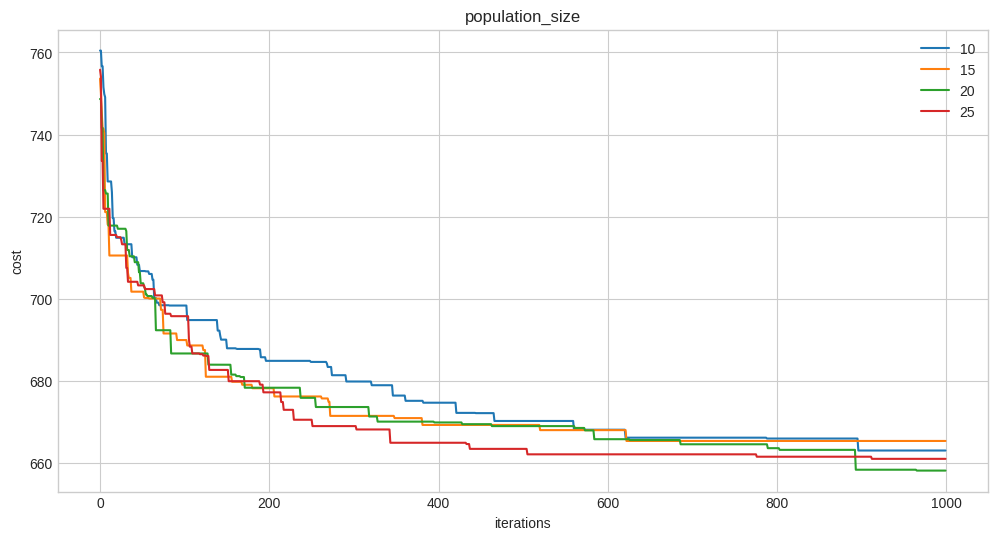

In [7]:
plot_parameter_impact('population_size', [10, 15, 20, 25], problem)

[715.12, 662.06, 661.32, 658.13, 668.3299999999999]

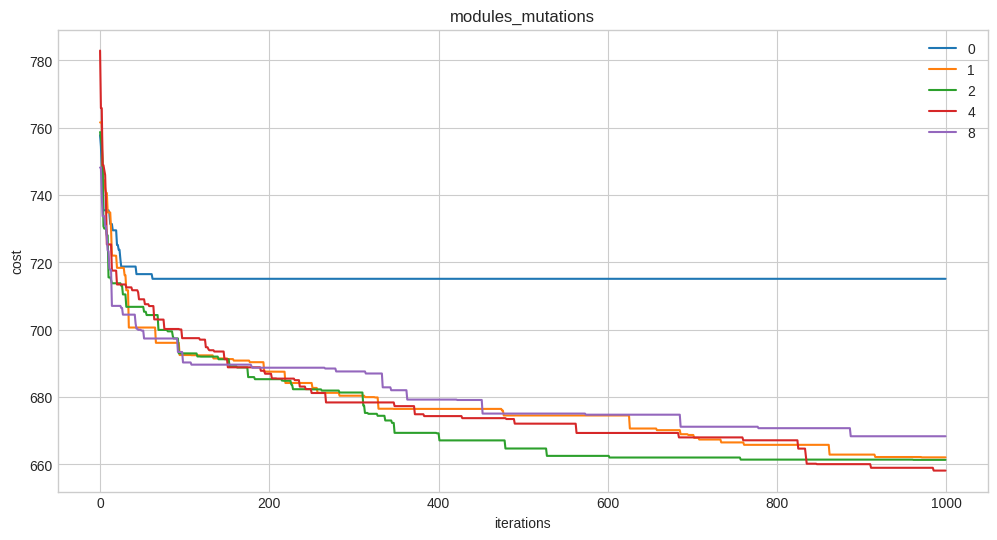

In [8]:
plot_parameter_impact('modules_mutations', [0, 1, 2, 4, 8], problem)

[668.75, 662.21, 677.03, 695.0799999999999, 709.5999999999999]

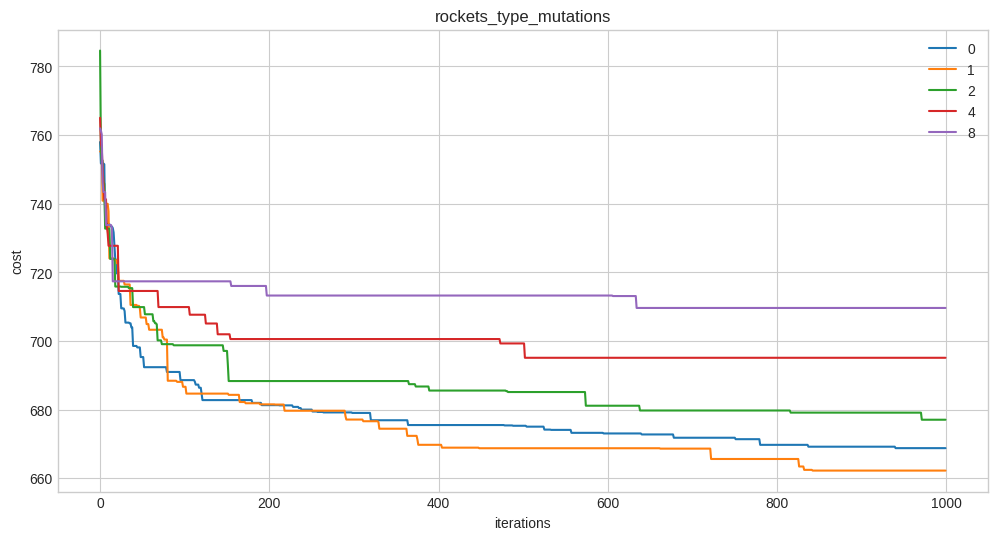

In [9]:
plot_parameter_impact('rockets_type_mutations', [0, 1, 2, 4, 8], problem)

[670.28, 661.29, 662.5699999999999, 660.7, 665.0699999999999]

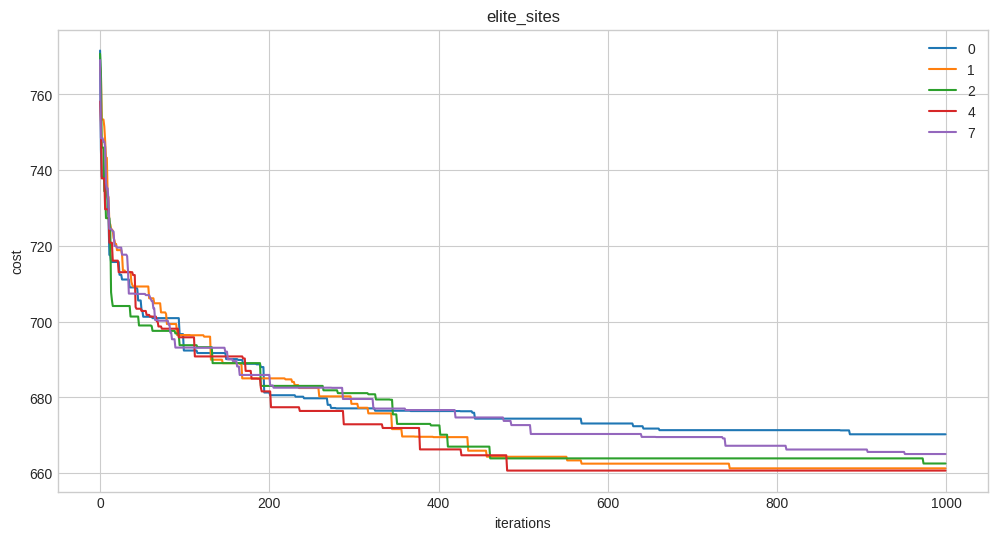

In [10]:
plot_parameter_impact('elite_sites', [0, 1, 2, 4, 7], problem)

[672.44, 669.35, 661.4200000000001, 661.95, 659.5799999999999]

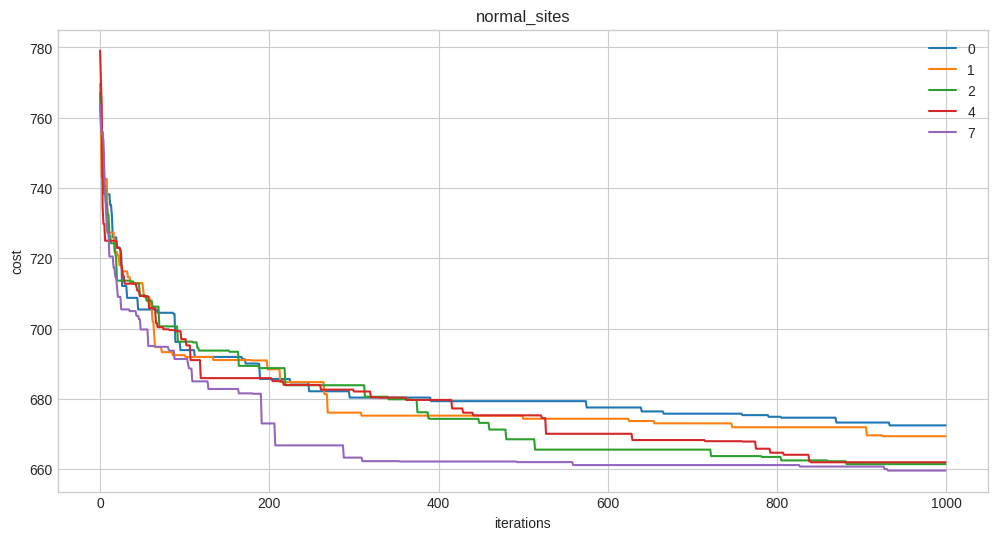

In [11]:
plot_parameter_impact('normal_sites', [0, 1, 2, 4, 7], problem)

[664.87, 657.18, 657.33, 653.01, 646.81]

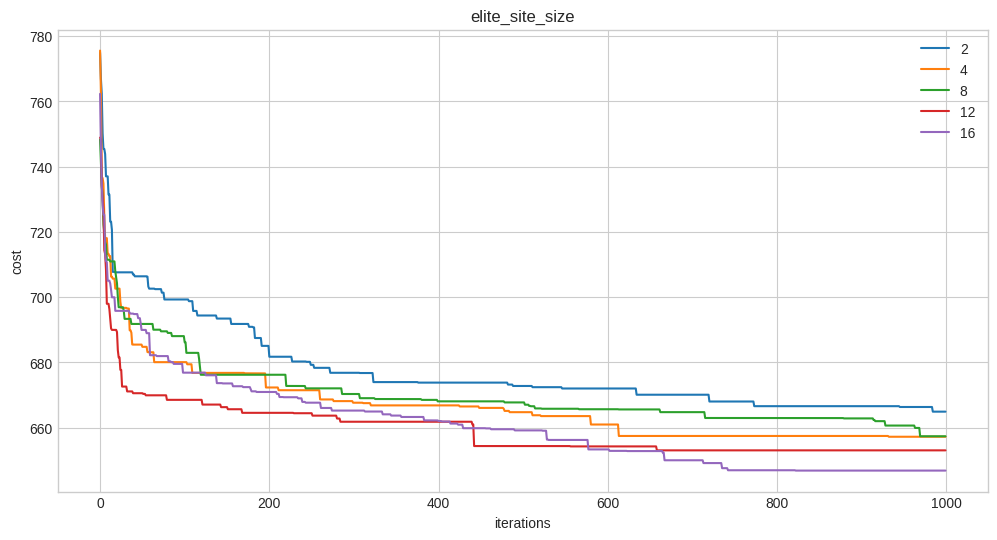

In [12]:
plot_parameter_impact('elite_site_size', [2, 4, 8, 12, 16], problem)

[662.77, 672.76, 661.29, 660.39, 658.22]

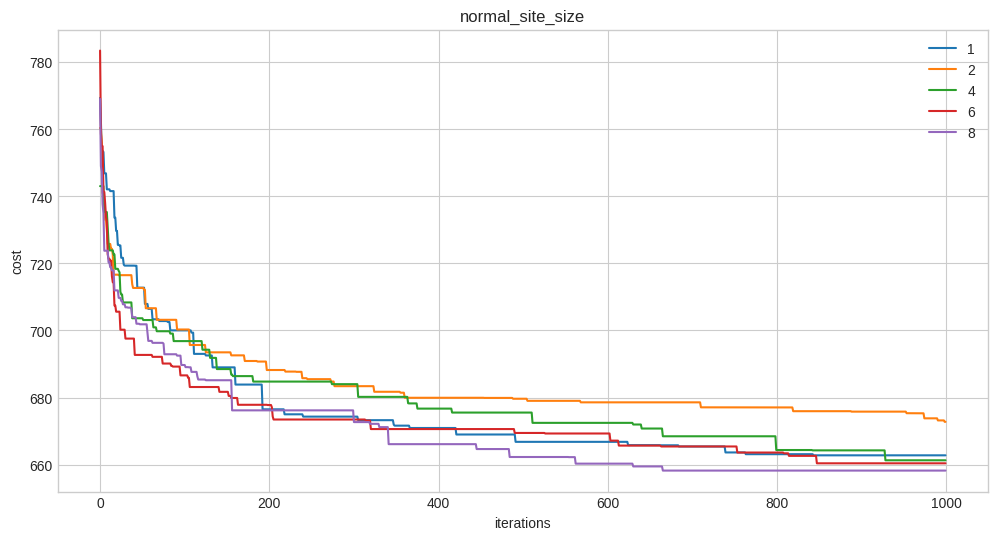

In [13]:
plot_parameter_impact('normal_site_size', [1, 2, 4, 6, 8], problem)